# Lab 5: Non-negative Matrix Factorization

The goal of this lab session is to code a NMF algorithm and use it in some applications.

You have to send the filled notebook named **"L5_familyname1_familyname2.ipynb"** (groups of 2) by email to *violeta.roizman@l2s.centralesupelec.fr* by October 31, 2018 and put **"AML-L5"** in the subject. 

We begin with the standard imports:

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import time
%matplotlib inline
sns.set_context('poster')
sns.set_color_codes()
plot_kwds = {'alpha' : 0.25, 's' : 80, 'linewidths':0}

## NMF

Non-negative Matrix Factorization is a model where a matrix V is factorized into two matrices W and H, with the property that all three matrices have no negative elements. This non-negativity makes the resulting matrices easier to interpret.

Fill in the following class that implements a NMF by multiplicative updates using the Frobenius norm or the Kullback-Leiber divergence as loss function (implement both). Try 10 different random initializations and choose the best one.

In [190]:
class my_NMF():
    
    def __init__(self, n_components, loss, epsilon, max_iter = 60):
        '''
        Attributes:
        
        n_components_ : integer
            the unknown dimension of W and H
        max_iter_: integer
            maximum number of iterations
        epsilon_: float
            convergence
        loss_ = {"Frobenius", "KL"}
        w_: np.array
            W Matrix factor
        H_: np.array
            H Matrix factor
        '''
        self.n_components_ = n_components
        self.max_iter_ = max_iter
        self.loss_ = loss
        self.epsilon_ = epsilon
        self.W_ = None
        self.H_ = None
        
    def fit_transform(self, X):
        """ Find the factor matrices W and H
        
        Parameters:
        -----------
        X: (n, p) np.array
            Data matrix
        
        Returns:
        -----
        self
        """   

        if self.loss_ == "Frobenius":
            
            n,p = X.shape
            n = int(n)
            p = int(p)
            self.n_components_= int(self.n_components_)
            self.W_ = np.random.rand(n,self.n_components_) + np.ones((n,self.n_components_))*0.0001
            self.H_ = np.random.rand(self.n_components_,p) + np.ones((self.n_components_,p))*0.0001
            
            n_it=0
            crit = np.linalg.norm(X - np.dot(self.W_,self.H_))
            while n_it < self.max_iter_ and self.epsilon_ < crit :
                print('iteration n°{}'.format(n_it))
                n_it+=1
                
                X_H_T= X @ self.H_.T 
                W_H_H_T=(self.W_ @ self.H_) @ self.H_.T
                W_H_H_T += np.ones(W_H_H_T.shape)*10e-12
                self.W_=self.W_ * X_H_T / W_H_H_T

                W_T_X=self.W_.T @ X
                W_T_W_T=(self.W_.T @ self.W_) @ self.H_ 
                W_T_W_T += np.ones(W_T_W_T.shape)*10e-12
                self.H_=self.H_ * W_T_X / W_T_W_T          

                crit = np.linalg.norm(X - self.W_ @ self.H_)
        
        elif self.loss_ == "KL":
            
            X = np.array(X)
            X = X[np.all(~(X == 0),axis = 1)]
            n,p = X.shape
            n = int(n)
            p = int(p)
            self.n_components_= int(self.n_components_)
            self.W_ = np.random.rand(n,self.n_components_) + np.ones((n,self.n_components_))*0.0001
            self.H_ = np.random.rand(self.n_components_,p) + np.ones((self.n_components_,p))*0.0001
            
            n_it=0
            W_H = self.W_ @ self.H_
            crit = np.linalg.norm(W_H - X - np.multiply(X,np.log(X/W_H)))
            while n_it < self.max_iter_ and self.epsilon_ < crit :
                print('iteration n°{}'.format(n_it))
                n_it+=1

                W_H = np.dot(self.W_,self.H_)
                
                #H_X= np.multiply(self.H_,X.T) 
                
                for i in range(n):
                    for k in range(self.n_components_):
                        self.W_[i,k] += self.W_[i,k]*(np.sum(self.H_[k]*X[i]/W_H[i]))/np.sum(self.H_[k])
                
                for k in range(self.n_components_):
                    for j in range(p):
                        self.H_[k,j] += self.H_[k,j]*(np.sum(self.W_.T[k]*X.T[j]/W_H.T[j]))/np.sum(self.W_.T[k])     
            
            W_H = self.W_ @ self.H_
            crit=np.linalg.norm(W_H - X - np.multiply(X,np.log(X/W_H)))
         
        return self.W_, self.H_

**Bonus (not graded)**: Implement the regularized version

## Applications

### First application

For the first application you are going to analyse the following data to give an interpretation of the factorization:

(400, 4096)

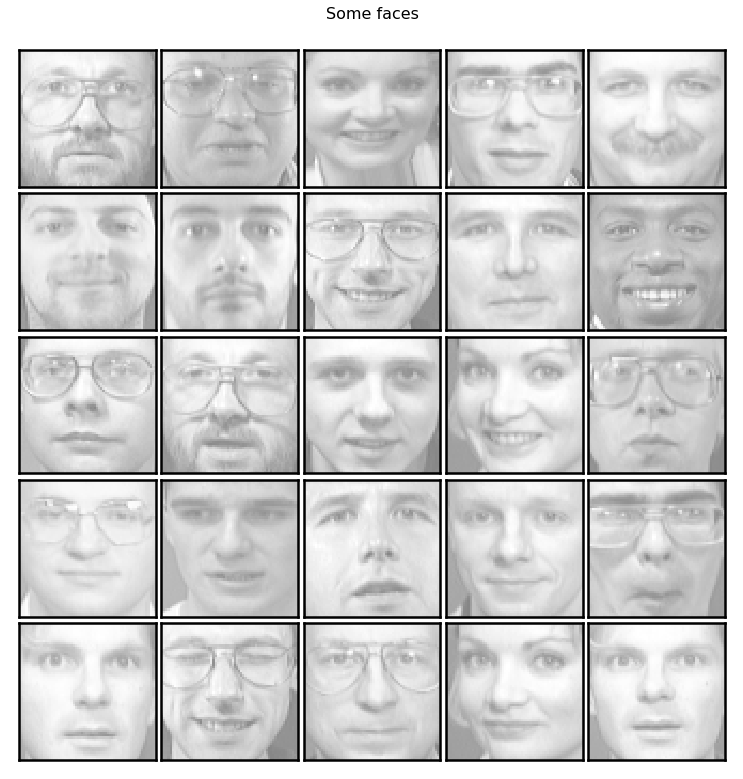

In [3]:
from sklearn.datasets import fetch_olivetti_faces

dataset = fetch_olivetti_faces(shuffle=True)

faces = dataset.data
image_shape = (64, 64)

n_samples, n_features = faces.shape

def plot_faces(title, images, image_shape, n_col=5, n_row=5, cmap=plt.cm.gray):
    plt.figure(figsize=(2. * n_col, 2.26 * n_row))
    plt.suptitle(title, size=16)
    for i, comp in enumerate(images):
        plt.subplot(n_row, n_col, i + 1)
        vmax = max(comp.max(), -comp.min())
        plt.imshow(comp.reshape(image_shape), cmap=cmap,
                   interpolation='nearest',
                   vmin=-vmax, vmax=vmax)
        plt.xticks(())
        plt.yticks(())
    plt.subplots_adjust(0.01, 0.05, 0.99, 0.93, 0.04, 0.)
    
plot_faces("Some faces", faces[:25], image_shape)

faces.shape

Apply your NMF algorithm for this dataset and plot the approximated face pictures.

#### Frobenius distance

iteration n°0
iteration n°1
iteration n°2
iteration n°3
iteration n°4
iteration n°5
iteration n°6
iteration n°7
iteration n°8
iteration n°9
iteration n°10
iteration n°11
iteration n°12
iteration n°13
iteration n°14
iteration n°15
iteration n°16
iteration n°17
iteration n°18
iteration n°19
iteration n°20
iteration n°21
iteration n°22
iteration n°23
iteration n°24
iteration n°25
iteration n°26
iteration n°27
iteration n°28
iteration n°29
iteration n°30
iteration n°31
iteration n°32
iteration n°33
iteration n°34
iteration n°35
iteration n°36
iteration n°37
iteration n°38
iteration n°39
iteration n°40
iteration n°41
iteration n°42
iteration n°43
iteration n°44
iteration n°45
iteration n°46
iteration n°47
iteration n°48
iteration n°49
iteration n°50
iteration n°51
iteration n°52
iteration n°53
iteration n°54
iteration n°55
iteration n°56
iteration n°57
iteration n°58
iteration n°59
iteration n°60
iteration n°61
iteration n°62
iteration n°63
iteration n°64
iteration n°65
iteration n°66
itera

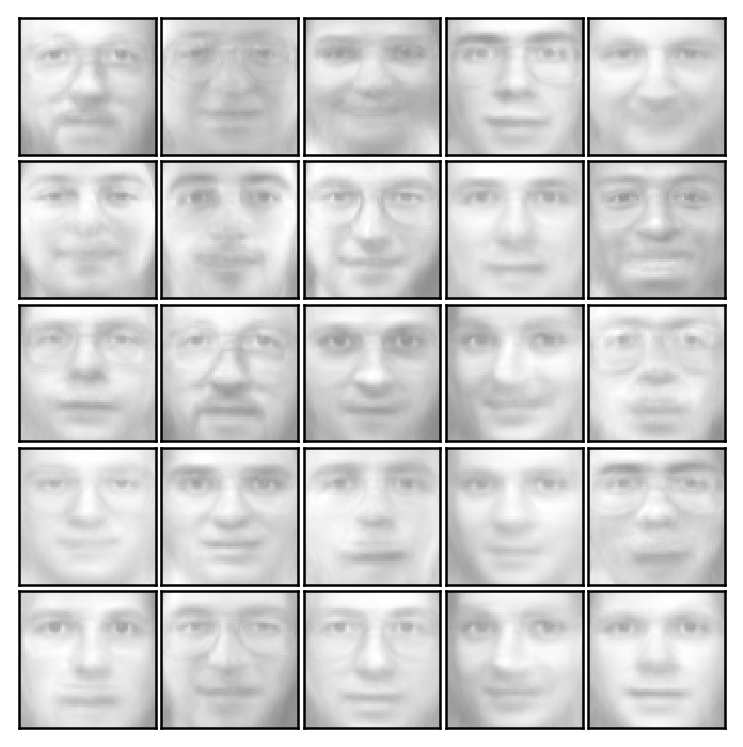

In [4]:
n_comp=25
Algo = my_NMF(n_comp, loss = 'Frobenius', epsilon = 1e-6 , max_iter = 1000)
W, H = Algo.fit_transform(faces.T)

App_faces = np.dot(W,H)

dim = int(np.sqrt(n_comp))
plt.figure(figsize=(2. * dim, 2.26 * dim))
image_shape = (64, 64)

for i in range(n_comp) :
    plt.subplot(dim, dim, i + 1)
    vmax = max(App_faces.T[i].max(), -App_faces.T[i].min())
    plt.imshow(App_faces.T[i].reshape(image_shape), cmap=plt.cm.gray,
               interpolation='nearest',
               vmin=-vmax, vmax=vmax)
    plt.xticks(())
    plt.yticks(())
    plt.subplots_adjust(0.01, 0.05, 0.99, 0.93, 0.04, 0.)

#### Kulback-Leibler distance 

In [191]:
n_comp_KL=9
Algo_KL = my_NMF(n_comp_KL, loss = 'KL', epsilon = 1e-6 , max_iter = 1000)
W_KL, H_KL = Algo_KL.fit_transform(faces.T)

iteration n°0
iteration n°1
iteration n°2
iteration n°3
iteration n°4
iteration n°5
iteration n°6
iteration n°7
iteration n°8
iteration n°9
iteration n°10
iteration n°11
iteration n°12
iteration n°13
iteration n°14
iteration n°15
iteration n°16
iteration n°17
iteration n°18
iteration n°19
iteration n°20
iteration n°21
iteration n°22
iteration n°23
iteration n°24
iteration n°25
iteration n°26
iteration n°27
iteration n°28
iteration n°29
iteration n°30
iteration n°31
iteration n°32
iteration n°33
iteration n°34
iteration n°35
iteration n°36
iteration n°37
iteration n°38
iteration n°39
iteration n°40
iteration n°41
iteration n°42
iteration n°43
iteration n°44
iteration n°45
iteration n°46
iteration n°47
iteration n°48
iteration n°49
iteration n°50
iteration n°51
iteration n°52
iteration n°53
iteration n°54
iteration n°55
iteration n°56
iteration n°57
iteration n°58
iteration n°59
iteration n°60
iteration n°61
iteration n°62
iteration n°63
iteration n°64
iteration n°65
iteration n°66
itera

In [ ]:
print(W_KL.shape) #One face has been removed because of the logarithmic computation couldn't be done on 0.
W_KL = np.vstack((W_KL,np.ones(9)*1/2))
print(H_KL.shape)

(4096, 9)
(9, 400)


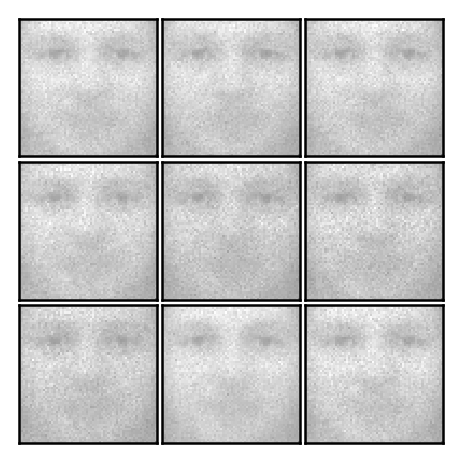

In [168]:
App_faces_KL = np.dot(W_KL,H_KL)

dim = int(np.sqrt(n_comp_KL))
plt.figure(figsize=(2. * dim, 2.26 * dim))
image_shape = (64, 64)

for i in range(n_comp_KL) :
    plt.subplot(dim, dim, i + 1)
    vmax = max(App_faces_KL.T[i].max(), -App_faces_KL.T[i].min())
    plt.imshow(App_faces_KL.T[i].reshape(image_shape), cmap=plt.cm.gray,
               interpolation='nearest',
               vmin=-vmax, vmax=vmax)
    plt.xticks(())
    plt.yticks(())
    plt.subplots_adjust(0.01, 0.05, 0.99, 0.93, 0.04, 0.)

**Nota Bene**: Computation with the Kulback-Leibler distance takes more time, so we restrained the factorization to 9 features

### 2nd Question (We'll use the Frobenius distance algorithm)

- Plot the $W$ matrix as images in a $(\sqrt{r}, \sqrt{r})$ grid
- Choose one face, plot its corresponding weights (in $H$) in a grid  and explain the interpretation of the both factor matrices.

In [5]:
print(W.shape)
print(H.shape)

(4096, 25)
(25, 400)


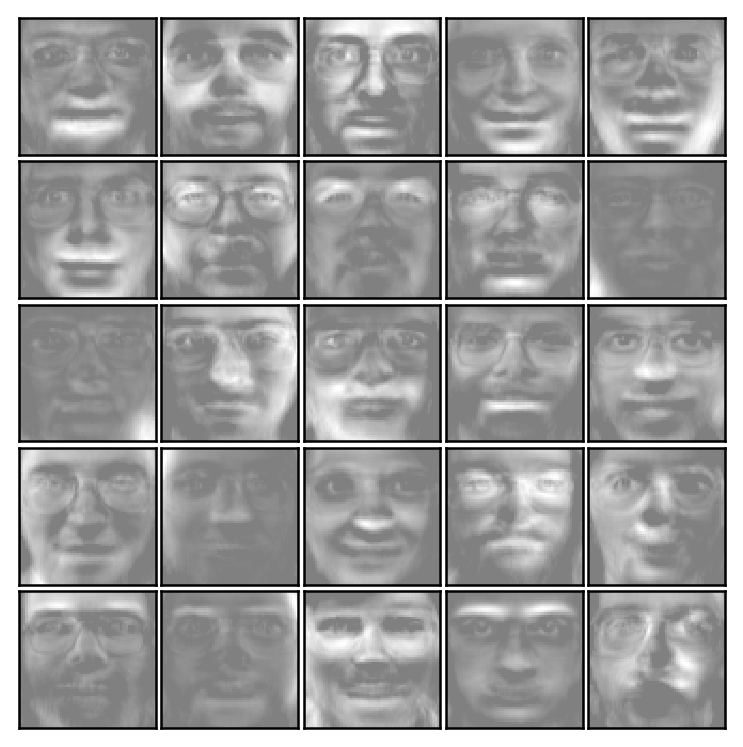

In [6]:
n_comp=25
dim = int(np.sqrt(n_comp))
grid_shape = (dim,dim)
image_shape = (64, 64)
plt.figure(figsize=(2. * dim, 2.26 * dim))

for i in range(n_comp) :
    plt.subplot(dim, dim, i + 1)
    vmax = max(W.T[i].max(), -W.T[i].min())
    plt.imshow(W.T[i].reshape(image_shape), cmap=plt.cm.gray,
               interpolation='nearest',
               vmin=-vmax, vmax=vmax)
    plt.xticks(())
    plt.yticks(())
    plt.subplots_adjust(0.01, 0.05, 0.99, 0.93, 0.04, 0.)

#### Importance of each feature in the first face (H[0])

([], <a list of 0 Text yticklabel objects>)

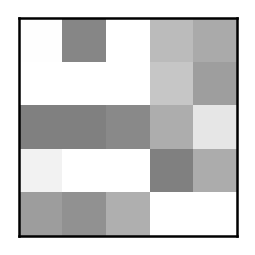

In [7]:
#We take the first face of our dataset and plot its weights in H
vmax = max(H.T[0][i].max(), -H.T[0][i].min())
plt.imshow(H.T[0].reshape(grid_shape), cmap=plt.cm.gray,
           interpolation='nearest',
           vmin=-vmax, vmax=vmax)
plt.xticks(())
plt.yticks(())

### Second application

Import the 20newsgroups dataset (from sklearn.datasets import fetch_20newsgroups_vectorized) that contains a collection of ~18,000 newsgroup documents from 20 different newsgroups.

Model the topics present in a subsample with NMF. Print the most common words of each topic.

#### Creation of vectorized representation of the documents with Tf_idf weighting technique

In [152]:
from sklearn.datasets import fetch_20newsgroups
from sklearn.feature_extraction.text import TfidfVectorizer

categories = ['sci.space','talk.politics.guns','rec.sport.hockey']
newsgroup = fetch_20newsgroups(subset='train',categories=categories,remove=('headers', 'footers', 'quotes'))

vectorizer = TfidfVectorizer(max_features=5000,stop_words ='english')  #min_df = 20, token_pattern=u'(?u)\b\w*[a-zA-Z]\w*\b')
vectors = vectorizer.fit_transform(newsgroup.data)

print(vectors.T.shape)

(5000, 1739)


The data (1739 documents) is embedded in a 5000-dimensional space. The number of dimension is restrained to the 5000 most occuring words on purpose for computing reasons.

#### we build a matrix factorisation of 3 features (ideally the categories)

In [153]:
n_comp=3
Algo = my_NMF(n_comp, loss = 'Frobenius', epsilon = 1e-6 , max_iter = 100)
W_NLP, H_NLP = Algo.fit_transform(vectors.T)

iteration n°0
iteration n°1
iteration n°2
iteration n°3
iteration n°4
iteration n°5
iteration n°6
iteration n°7
iteration n°8
iteration n°9
iteration n°10
iteration n°11
iteration n°12
iteration n°13
iteration n°14
iteration n°15
iteration n°16
iteration n°17
iteration n°18
iteration n°19
iteration n°20
iteration n°21
iteration n°22
iteration n°23
iteration n°24
iteration n°25
iteration n°26
iteration n°27
iteration n°28
iteration n°29
iteration n°30
iteration n°31
iteration n°32
iteration n°33
iteration n°34
iteration n°35
iteration n°36
iteration n°37
iteration n°38
iteration n°39
iteration n°40
iteration n°41
iteration n°42
iteration n°43
iteration n°44
iteration n°45
iteration n°46
iteration n°47
iteration n°48
iteration n°49
iteration n°50
iteration n°51
iteration n°52
iteration n°53
iteration n°54
iteration n°55
iteration n°56
iteration n°57
iteration n°58
iteration n°59
iteration n°60
iteration n°61
iteration n°62
iteration n°63
iteration n°64
iteration n°65
iteration n°66
itera

#### Retrieving most frequent words of the matrix representation of one of the document present in the dataset

In [183]:
classifier =(W_NLP @ H_NLP)
feature_names = np.asarray(vectorizer.get_feature_names())
top20_classifier_doc_40 = np.argsort(classifier.T[50])[-20:]

print("classifier representatives words for document 50: ", feature_names[top20_classifier_doc_40])

classifier representatives words for document 40:  ['win' 'time' 'leafs' 'just' 'good' 'don' 'teams' 'detroit' 'like'
 'league' 'think' 'year' 'nhl' 'season' 'games' 'play' 'players' 'hockey'
 'team' 'game']


#### Showing top 10 weighted words in our 3 features matrix 

In [188]:
def show_top10(classifier, vectorizer):
    feature_names = np.asarray(vectorizer.get_feature_names())
    for i, category in enumerate(['talk.politics.guns','sci.space','rec.sport.hockey']):
        top10 = np.argsort(W_NLP.T[i])[-20:]
        print(category,"\n", feature_names[top10],"\n")

show_top10(classifier, vectorizer)

talk.politics.guns 
 ['good' 'time' 'firearms' 'fbi' 'did' 'crime' 'control' 'make' 'weapons'
 'law' 'know' 'government' 'right' 'like' 'think' 'just' 'guns' 'don'
 'people' 'gun'] 

sci.space 
 ['spacecraft' 'solar' 'mission' 'research' 'like' 'satellite' 'gov' 'cost'
 'sci' 'data' 'station' 'program' 'lunar' 'earth' 'orbit' 'moon' 'shuttle'
 'launch' 'nasa' 'space'] 

rec.sport.hockey 
 ['playoffs' 'pittsburgh' 'good' 'player' 'toronto' 'think' 'win' 'leafs'
 'teams' 'detroit' 'league' 'year' 'nhl' 'season' 'games' 'play' 'players'
 'hockey' 'team' 'game'] 



**Nota Bene** : Here we "hard-coded" the category name associated with each of the 3 feature. Indeed, the factorization algorithm can be seen as an unsupervised algorithm, so it creates its own labels. After saying that, the category of our feature are easily recognizable in our exemple.